# Task
Please use the attached dataset to provide a binary classification of the column “Type”. The dataset is provided into two different tables with unique identifier of column “ID”. Tip: This column (ID) can be used to match the two tables.

In [112]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Preset matplotlib figure sizes
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [113]:
# CSV file path
csv_file_path1 = './Task1_1.csv'
csv_file_path2 = './Task1_2.csv'

# Read into DataFrame
df1 = pd.read_csv(csv_file_path1, delimiter=';')
df2 = pd.read_csv(csv_file_path2, delimiter=';')

# merge df
dataset = pd.merge(df1, df2, on='ID')
dataset.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
3,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
4,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17


In [114]:
dataset.describe(include='all')

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
count,4475.000000,4475.000000,4401,1867,4475,4401,4475.000000,4398,4361.000000,4.361000e+03,4398,4475.00000,4475.000000,4475,4475,4430,4475,4475,4429.000000
unique,NaN,NaN,3,2,3,3,NaN,12,NaN,NaN,8,NaN,NaN,2,2,2,2,2,NaN
top,NaN,NaN,oooo,x,oooo,www,NaN,vvvv,NaN,NaN,qqqq,NaN,NaN,f,t,wwww,t,y,NaN
freq,NaN,NaN,3704,1226,4145,3704,NaN,936,NaN,NaN,2459,NaN,NaN,2310,3842,2895,2704,4135,NaN
mean,1838.977430,96.316872,NaN,NaN,NaN,NaN,2286.035531,NaN,163.132538,1.631325e+06,NaN,4.13743,3.392010,NaN,NaN,NaN,NaN,NaN,32.707180
std,1069.445348,56.013921,NaN,NaN,NaN,NaN,8938.486172,NaN,154.868928,1.548689e+06,NaN,6.73863,4.281415,NaN,NaN,NaN,NaN,NaN,12.602387
min,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,13.750000
25%,898.500000,47.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,NaN,0.00000,0.500000,NaN,NaN,NaN,NaN,NaN,22.920000
50%,1838.000000,101.000000,NaN,NaN,NaN,NaN,113.000000,NaN,120.000000,1.200000e+06,NaN,2.00000,1.750000,NaN,NaN,NaN,NaN,NaN,28.670000
75%,2766.500000,152.000000,NaN,NaN,NaN,NaN,1000.000000,NaN,280.000000,2.800000e+06,NaN,6.00000,5.000000,NaN,NaN,NaN,NaN,NaN,40.000000


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 0 to 4474
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4475 non-null   int64  
 1   UKL     4475 non-null   int64  
 2   GJAH    4401 non-null   object 
 3   ZIK     1867 non-null   object 
 4   HUI     4475 non-null   object 
 5   ERZ     4401 non-null   object 
 6   CDx     4475 non-null   float64
 7   BJZHD   4398 non-null   object 
 8   NKJUD   4361 non-null   float64
 9   LPI     4361 non-null   float64
 10  BJKG    4398 non-null   object 
 11  POUG    4475 non-null   int64  
 12  TRE     4475 non-null   float64
 13  ZUB     4475 non-null   object 
 14  VOL     4475 non-null   object 
 15  UIO     4430 non-null   object 
 16  VBNM    4475 non-null   object 
 17  Type    4475 non-null   object 
 18  OIN     4429 non-null   float64
dtypes: float64(5), int64(3), object(11)
memory usage: 699.2+ KB


In [116]:
# reorder target column
cols = ['ID', 'UKL', 'GJAH', 'ZIK', 'HUI', 'ERZ', 'CDx', 'BJZHD', 'NKJUD',
             'LPI', 'BJKG', 'POUG', 'TRE', 'ZUB', 'VOL', 'UIO', 'VBNM', 'OIN', 'Type']

dataset = dataset[cols]
# handle missing values
#dataset = dataset.fillna(dataset.mean)
dataset = dataset.dropna()

# Splitting into train and test sets, random_state for reproducible output 
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 4474
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1758 non-null   int64  
 1   UKL     1758 non-null   int64  
 2   GJAH    1758 non-null   object 
 3   ZIK     1758 non-null   object 
 4   HUI     1758 non-null   object 
 5   ERZ     1758 non-null   object 
 6   CDx     1758 non-null   float64
 7   BJZHD   1758 non-null   object 
 8   NKJUD   1758 non-null   float64
 9   LPI     1758 non-null   float64
 10  BJKG    1758 non-null   object 
 11  POUG    1758 non-null   int64  
 12  TRE     1758 non-null   float64
 13  ZUB     1758 non-null   object 
 14  VOL     1758 non-null   object 
 15  UIO     1758 non-null   object 
 16  VBNM    1758 non-null   object 
 17  OIN     1758 non-null   float64
 18  Type    1758 non-null   object 
dtypes: float64(5), int64(3), object(11)
memory usage: 339.2+ KB


In [117]:
# The ID column can be dropped since each row is unique
x_train_val, y_train_val = train_dataset.iloc[:, 1:len(cols) - 2], train_dataset.iloc[:, len(cols) - 1]
x_train, y_train = x_train_val.sample(frac=0.8, random_state=42), y_train_val.sample(frac=0.8, random_state=42)
x_val, y_val = x_train_val.drop(x_train.index), y_train_val.drop(y_train.index)

x_test, y_test = test_dataset.iloc[:, 1:len(cols) - 2], test_dataset.iloc[:, len(cols) - 1]

print("Train X shape:", x_train.shape)
print("Train Y shape:", y_train.shape)
print("Validation X shape:", y_train.shape)
print("Validation Y shape:", y_train.shape)
print("Test X shape:", x_test.shape)
print("Test Y shape:", y_test.shape)


Train X shape: (1125, 16)
Train Y shape: (1125,)
Validation X shape: (1125,)
Validation Y shape: (1125,)
Test X shape: (352, 16)
Test Y shape: (352,)


In [118]:
# convert classes labels into 0, 1
encoder = LabelEncoder()
encoder.fit(y_train_val)
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)
print(encoder.classes_)

['n' 'y']


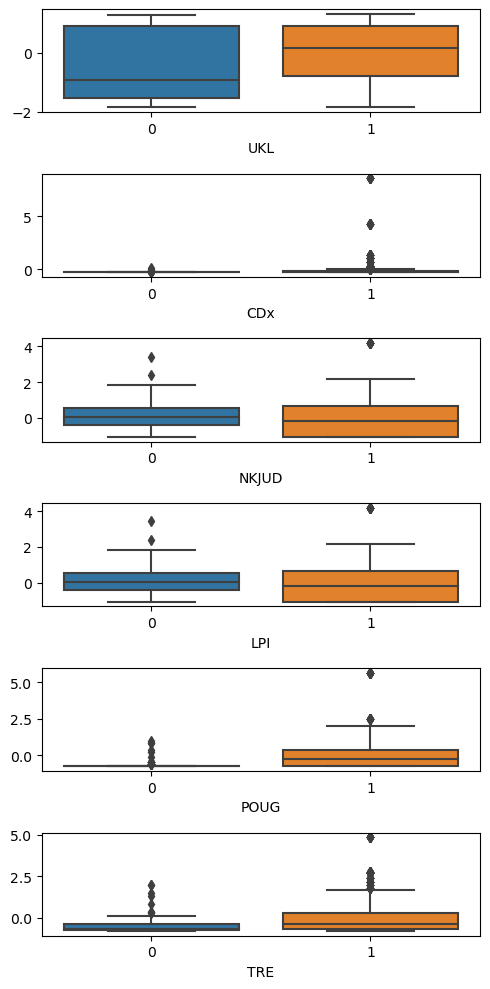

In [119]:
# numerical columns
numerical_features = [x for x in x_train if x_train[x].dtypes != 'object']
categorical_features = [x for x in x_train if x_train[x].dtypes == 'object']
fig, axs = plt.subplots(len(numerical_features), figsize=(5, 10))

# normailze to accomodate outliers
preprocessor = StandardScaler()
x_train_numerical = x_train[numerical_features]
x_train_scaled = preprocessor.fit_transform(x_train_numerical)

for i, x in enumerate(numerical_features):
    sns.boxplot(x=y_train, y=x_train_scaled[:, i], data=x_train_numerical, ax=axs[i])
    #axs[i].set_yscale('log')
    axs[i].set_xlabel(x)

# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

`CDx`, `TRE` have many outliers which also lie in one class mostly

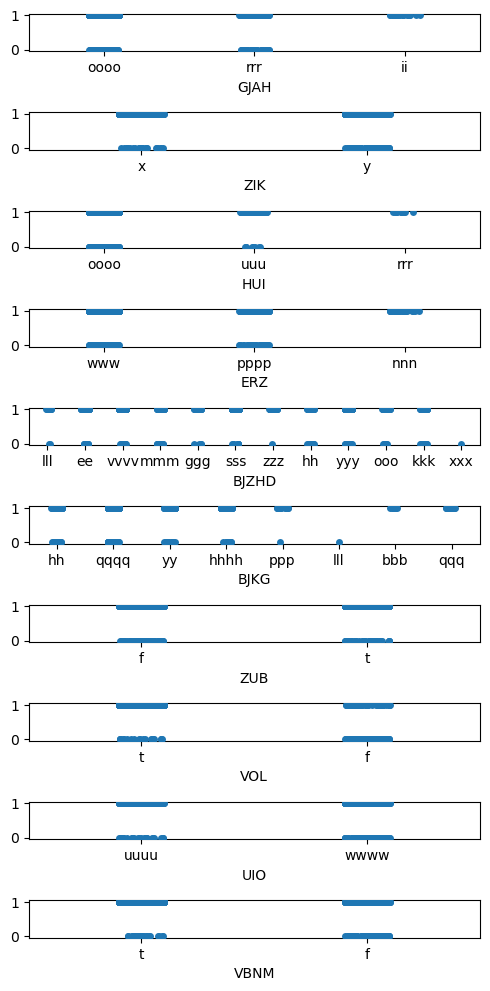

In [120]:
# categorical columns
categorical_features = [x for x in x_train if x_train[x].dtypes == 'object']
fig, axs = plt.subplots(len(categorical_features), figsize=(5, 10))

for i, x in enumerate(categorical_features):
    sns.stripplot(data=x_train, x=x, y=y_train, ax=axs[i])
    axs[i].set_xlabel(x)

plt.tight_layout()
plt.show()

most of these variables seem arbitrarly distributed except for `GJAH`, `HUI`, `ERZ`, `BJKG`, `BJZHD` which have categories that lie only on one class

Text(0.5, 1.0, 'Correlation Matrix')

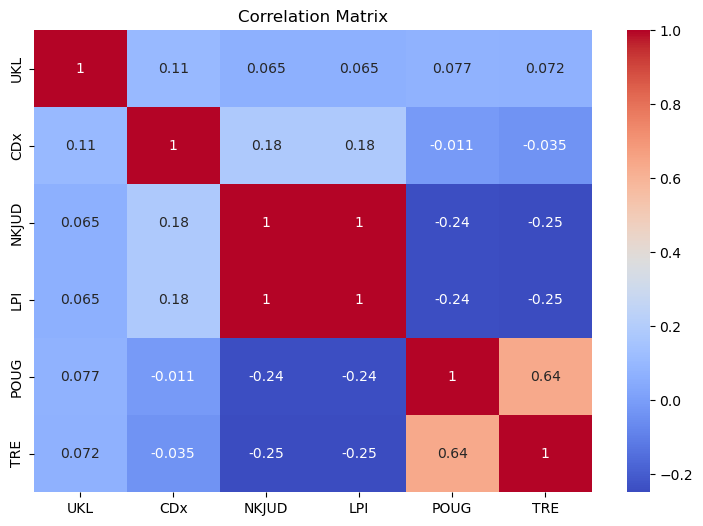

In [121]:
corr_matrix = x_train.corr(numeric_only=True)

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')


`LPI` and `NKJUD` are correlated, one of them could be removed

## Logistic Regression
- drop NaN, use all features, achieves 97.16% accuracy
- drop NaN, use selected features, achieves 93.18% accuracy

In [122]:
# Define the preprocessor
# apply standard scaler normalization for numerical features
# and one-hot encoding for categorical features

# remove NKJUD because its strongly correlated to LPI
selected_numerical_features = ['UKL', 'CDx', 'LPI', 'POUG', 'TRE']
# use only these categorical features, since the categories differ for some of thier categories.
# instead of the arbitrary distribution of the other variables
selected_categorical_features = ['GJAH', 'HUI', 'ERZ', 'BJKG', 'BJZHD']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the logistic regression model with the preprocessor as part of the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(x_train[numerical_features + categorical_features], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['UKL', 'CDx', 'NKJUD', 'LPI',
                                                   'POUG', 'TRE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['GJAH', 'ZIK', 'HUI', 'ERZ',
                                                   'BJZHD', 'BJKG', 'ZUB',
                                                   'VOL', 'UIO', 'VBNM'])])),
                ('classifier', LogisticRegression())])

0.9680


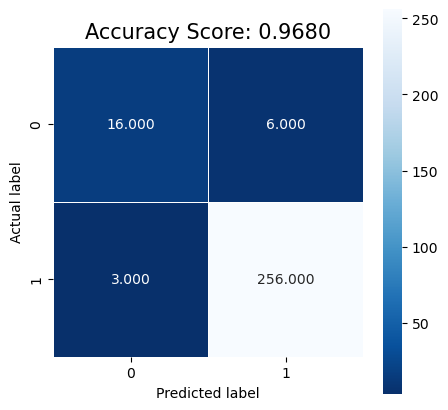

In [123]:
y_val_pred = model.predict(x_val)
score = model.score(x_val, y_val)
score = format(score, '.4f')
print(score)
confusion_matrix = sk_metrics.confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Test Model on Test Set

used only once at the end after fine tuning the model, to check overall performance.

0.9716


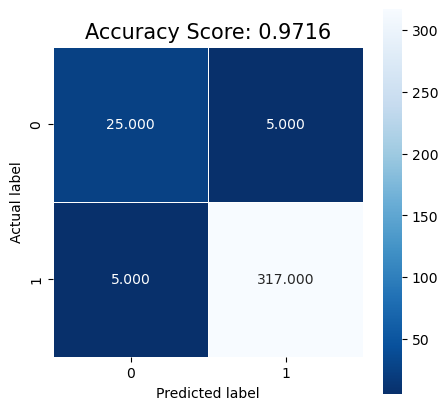

In [124]:
y_test_pred = model.predict(x_test)
score = model.score(x_test, y_test)
score = format(score, '.4f')
print(score)
confusion_matrix = sk_metrics.confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);